In [132]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [133]:
# importing file
df = pd.read_csv('cookies.csv')

# File inspection

In [134]:
# first five rows to know how it is structured
df.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3


In [135]:
# checking dtypes to know if they work for our analysis or if we need to perform some conversions
df.dtypes

sugar to flour ratio    float64
sugar index             float64
bake temp                 int64
chill time              float64
calories                float64
density                 float64
pH                      float64
grams baking soda       float64
bake time               float64
quality                   int64
butter type              object
weight                  float64
diameter                  int64
mixins                   object
crunch factor           float64
aesthetic appeal          int64
dtype: object

We need to convert the object columns, but first we will deal with the nan's.
### Dealing with Nan's

In [136]:
# looking for nan's
df.isna().sum()

sugar to flour ratio     0
sugar index              5
bake temp                0
chill time               0
calories                 0
density                  0
pH                       0
grams baking soda        0
bake time               10
quality                  0
butter type              0
weight                   0
diameter                 0
mixins                   2
crunch factor            0
aesthetic appeal         0
dtype: int64

We will try to estimate the values with the most correlated variable in the set if it is above 0.85

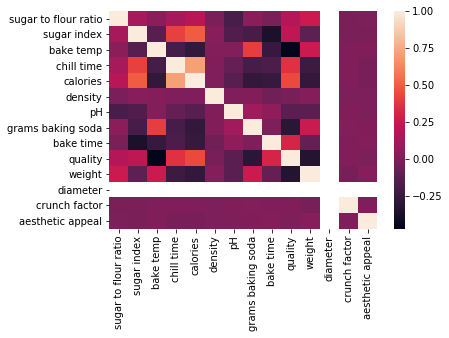

In [137]:
# ploting correlation heatmap
sns.heatmap(df.corr())

We looked for correlations but there's not a significant one. So we will use another method to fill the Nans.

In [138]:
# we have nans in sugar index
df[df['sugar index'].isna()]

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
16,0.02,NaN,670,9.0,23.0,3.00000,8.47,0.67,9.4,6,cubed,14.0,7,"nuts, oats, chocolate",1.95,3
77,0.14,NaN,360,38.0,155.0,0.99622,8.27,0.50,9.4,7,melted,12.4,7,raisins,1.82,3
1209,0.12,NaN,820,7.0,28.0,0.99700,8.37,0.50,9.4,6,cubed,15.6,7,"nuts,raisins",1.74,3
4331,0.52,NaN,470,63.0,186.0,0.99481,8.18,0.44,9.6,7,melted,12.6,7,raisins,1.35,3
4490,0.07,NaN,430,34.0,149.0,0.99440,8.34,0.57,9.7,7,melted,10.6,7,"nuts,raisins",1.80,3


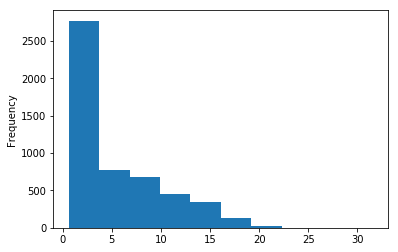

In [139]:
# we will check some plots in sugar index, so that we know if it makes sense to fill it with the mean
df['sugar index'].plot(kind='hist')

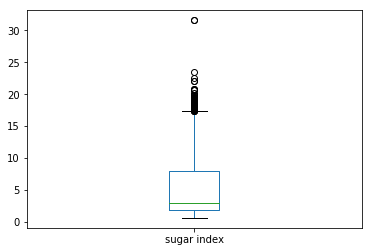

In [140]:
df['sugar index'].plot(kind='box')

As the mean won't be representative, because of the skewed distribution and outliers, we will use the median to fill the nans.

In [141]:
df['sugar index'] = df['sugar index'].fillna(value=df['sugar index'].median())

In [142]:
# checking it worked
df[df['sugar index'].isna()]

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal


In [143]:
# we have also nans in baketime
df[df['bake time'].isna()]

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
13,0.48,4.0,1860,64.0,150.0,0.99450,8.06,0.40,NaN,7,melted,12.8,7,"chocolate, oats",1.05,3
173,0.25,9.8,490,59.5,137.0,0.99500,8.16,0.38,NaN,8,melted,13.2,7,"chocolate, oats",1.46,3
484,0.33,2.9,440,21.0,73.0,0.98896,8.17,0.32,NaN,10,melted,11.2,7,"chocolate, oats",1.57,3
816,0.49,1.1,480,11.0,138.0,0.99290,8.01,0.42,NaN,7,melted,14.4,7,"nuts, chocolate",1.53,3
1562,0.74,1.8,330,33.0,156.0,0.99100,8.29,0.52,NaN,8,melted,15.6,7,raisins,1.54,3
1867,0.24,12.1,560,68.0,210.0,0.99718,8.05,0.50,NaN,7,melted,14.0,7,"nuts, chocolate",1.57,3
1933,0.23,8.6,560,56.0,215.0,0.99670,8.17,0.44,NaN,7,melted,13.8,7,chocolate,1.74,3
2215,0.38,10.2,280,20.0,82.0,0.99274,8.10,0.43,NaN,9,melted,13.0,7,raisins,1.30,3
2910,0.08,2.1,450,19.0,48.0,0.99490,8.49,0.49,NaN,6,cubed,12.8,7,"nuts, oats, chocolate",1.22,3
3746,0.46,12.6,420,41.0,143.0,1.00000,8.24,0.76,NaN,10,melted,15.6,7,"chocolate, oats",1.77,3


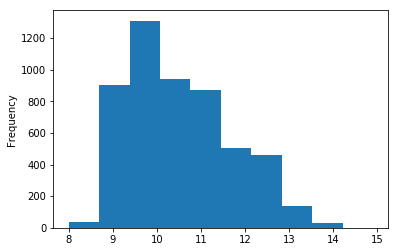

In [144]:
# we will check some plots in bake time, so that we know if it makes sense to fill it with the mean
df['bake time'].plot(kind='hist')

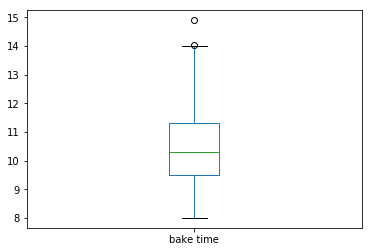

In [145]:
df['bake time'].plot(kind='box')

We fill it with the mean, there are not many outliers.


In [146]:
df['bake time'] = df['bake time'].fillna(value=df['bake time'].mean())

In [147]:
# we look at mixins nans
df[df['mixins'].isna()]

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
448,0.0,1.8,820,3.0,12.0,0.9964,8.54,0.48,10.9,5,cubed,16.2,7,NaN,1.96,3
4430,0.0,1.7,810,3.0,12.0,0.9964,8.53,0.49,10.9,5,cubed,16.4,7,NaN,1.89,3


In [148]:
# we will look for an option that is "nothing"
df['mixins'].value_counts()

chocolate                         1893
raisins                           1200
chocolate, oats                    749
nuts, chocolate                    521
nuts,raisins                       333
nuts, oats, chocolate              295
nuts, oats                         107
chocolate, peanut butter            52
raisins, oats                       24
peanut butter                       15
oats                                 4
chocolate, oats, peanut butter       2
peanut butter, raisins               1
Name: mixins, dtype: int64

As there is no nothing, and as we will convert this column to dummy variables, we will keep them as it may be that they have no mixins. Also we've seen they both have a sugar to flour ratio of zero, and low calories, which would confirm our assumtion.

### Dummy variables

In [149]:
# We don't want objects in our dataset, so we will convert them to booleans or dummy variable.
df['mixins'].unique()

array(['raisins', 'nuts, chocolate', 'chocolate', 'nuts, oats, chocolate',
       'chocolate, oats', 'raisins, oats', 'nuts,raisins', 'nuts, oats',
       'chocolate, peanut butter', 'chocolate, oats, peanut butter',
       'peanut butter', nan, 'peanut butter, raisins', 'oats'],
      dtype=object)

In [150]:
# We will create a dummy variable with the mixins column
mixins_type_list = ["raisins","nuts","chocolate","oats","peanut butter","nan"]

for type_mix in mixins_type_list:
    df[type_mix] = df["mixins"].str.contains(type_mix, regex=False, na=0).astype(int)

In [151]:
# checking that it worked
df.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,...,diameter,mixins,crunch factor,aesthetic appeal,raisins,nuts,chocolate,oats,peanut butter,nan
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,...,7,raisins,1.30,3,1,0,0,0,0,0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,...,7,raisins,1.71,3,1,0,0,0,0,0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,...,7,"nuts, chocolate",1.78,3,0,1,1,0,0,0
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,...,7,chocolate,1.59,3,0,0,1,0,0,0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,...,7,"nuts, oats, chocolate",1.30,3,0,1,1,1,0,0


In [152]:
# drop the column mixins, we don't need it anymore
df.drop('mixins', axis=1, inplace=True)

In [153]:
# we will convert butter type. First we will look at the uniques
df['butter type'].unique()

array(['melted', 'cubed'], dtype=object)

In [154]:
# as there are only two of them, we will create a column where 0 will mean melted and 1 will mean cubed.
df['butter melted or cubed'] = np.where(df['butter type'] == 'melted', 0, 1)

In [155]:
# checking it worked
df.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,...,diameter,crunch factor,aesthetic appeal,raisins,nuts,chocolate,oats,peanut butter,nan,butter melted or cubed
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,...,7,1.30,3,1,0,0,0,0,0,0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,...,7,1.71,3,1,0,0,0,0,0,0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,...,7,1.78,3,0,1,1,0,0,0,0
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,...,7,1.59,3,0,0,1,0,0,0,0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,...,7,1.30,3,0,1,1,1,0,0,1


In [156]:
# drop the column butter type, we don't need it anymore, also the nan column.
df.drop('butter type', axis=1, inplace=True)

In [164]:
df.drop('nan', axis=1, inplace=True)

In [170]:
#checking we have no objects in our datset
df.dtypes

sugar to flour ratio      float64
sugar index               float64
bake temp                   int64
chill time                float64
calories                  float64
density                   float64
pH                        float64
grams baking soda         float64
bake time                 float64
quality                     int64
weight                    float64
crunch factor             float64
aesthetic appeal            int64
raisins                     int64
nuts                        int64
chocolate                   int64
oats                        int64
peanut butter               int64
butter melted or cubed      int64
dtype: object

### Outliers

First we will deswcribe the dataset.

In [168]:
df.describe()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,crunch factor,aesthetic appeal,raisins,nuts,chocolate,oats,peanut butter,butter melted or cubed
count,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000
mean,0.318049,5.400154,559.638322,30.390246,115.015294,0.995819,8.222020,0.530864,10.494758,7.325125,14.381935,1.499367,3.000577,0.299731,0.241631,0.675644,0.227203,0.013467,0.245864
std,0.150036,4.666691,353.274062,17.268403,56.506171,0.062193,0.283323,0.150886,1.193434,1.302780,3.023740,0.289205,0.024019,0.458184,0.428113,0.468179,0.419065,0.115273,0.430640
min,0.000000,0.600000,90.000000,0.000000,-99.000000,0.987110,7.720000,0.220000,8.000000,3.000000,-99.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240000,1.800000,380.000000,17.000000,76.000000,0.992300,8.110000,0.430000,9.500000,7.000000,12.800000,1.250000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.505000,10.300000,8.000000,14.000000,1.500000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.390000,8.000000,640.000000,41.000000,155.000000,0.996908,8.320000,0.600000,11.300000,8.000000,15.400000,1.750000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,3.000000,31.600000,6110.000000,146.500000,366.500000,5.000000,25.000000,2.000000,14.900000,11.000000,31.800000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The column diameter is useless as it only has one value: 7. It does not give us any information so we will drop it.

In [159]:
df.drop('diameter', axis=1, inplace=True)

We use the zscore to get rid of the outliers in our dataset. We will use a zscore of 3 which in theory means 99.9% of the data will be kept.

In [167]:
df_clean = df[(np.abs(stats.zscore(df))<3).all(axis=1)]
print(df.shape, df_clean.shape)

((5198, 19), (4856, 19))


In [171]:
# we describe again to check
df.describe()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,crunch factor,aesthetic appeal,raisins,nuts,chocolate,oats,peanut butter,butter melted or cubed
count,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000
mean,0.318049,5.400154,559.638322,30.390246,115.015294,0.995819,8.222020,0.530864,10.494758,7.325125,14.381935,1.499367,3.000577,0.299731,0.241631,0.675644,0.227203,0.013467,0.245864
std,0.150036,4.666691,353.274062,17.268403,56.506171,0.062193,0.283323,0.150886,1.193434,1.302780,3.023740,0.289205,0.024019,0.458184,0.428113,0.468179,0.419065,0.115273,0.430640
min,0.000000,0.600000,90.000000,0.000000,-99.000000,0.987110,7.720000,0.220000,8.000000,3.000000,-99.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240000,1.800000,380.000000,17.000000,76.000000,0.992300,8.110000,0.430000,9.500000,7.000000,12.800000,1.250000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.505000,10.300000,8.000000,14.000000,1.500000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.390000,8.000000,640.000000,41.000000,155.000000,0.996908,8.320000,0.600000,11.300000,8.000000,15.400000,1.750000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,3.000000,31.600000,6110.000000,146.500000,366.500000,5.000000,25.000000,2.000000,14.900000,11.000000,31.800000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/anaconda3/envs/py3/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/envs/py3/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


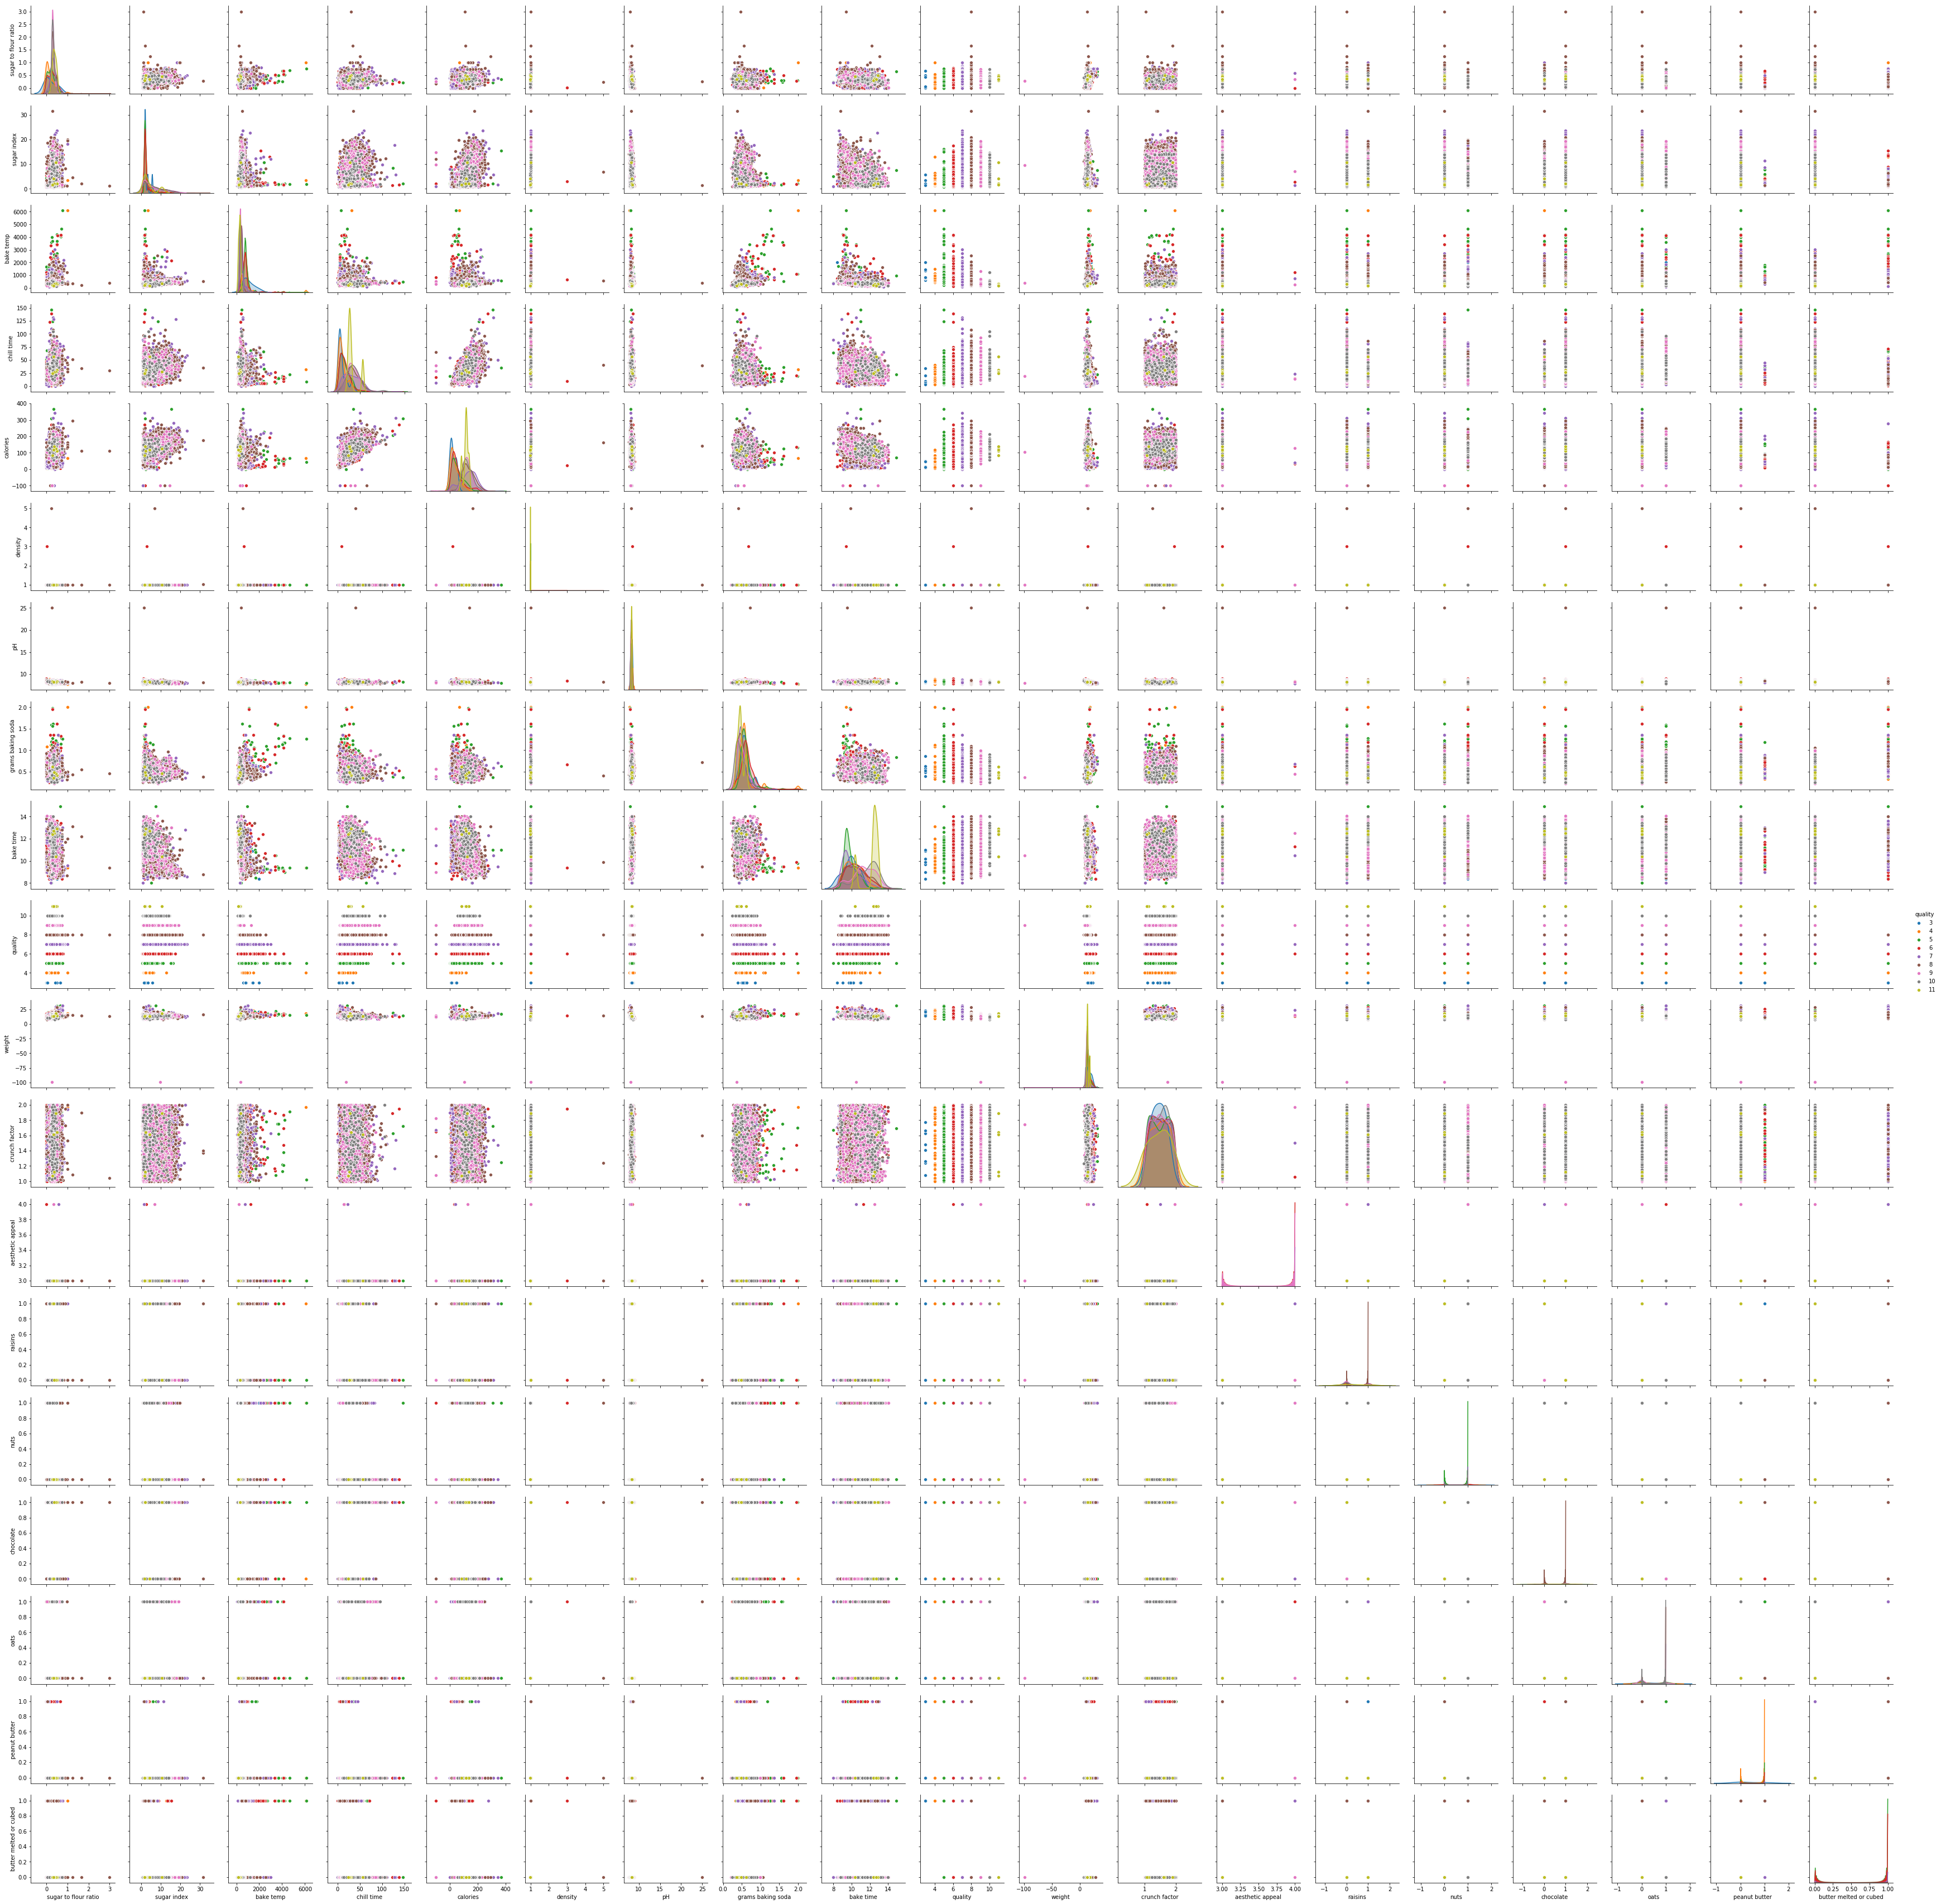

In [172]:
sns.pairplot(df, hue='quality')

# Rescaling

We will rescale the data so that all the variables have similar ranges and then the machine learning algorithms work better.

In [174]:
from sklearn import preprocessing
y = df["quality"]
X = df.drop("quality", axis=1)
# normalize the data attributes
normalized_X = preprocessing.normalize(X)
standardized_X = preprocessing.scale(X)

/anaconda3/envs/py3/lib/python2.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
